In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [2]:
!unzip Archive.zip

Archive:  Archive.zip
   creating: user1/
  inflating: __MACOSX/._user1        
  inflating: user1/datos_6_1.csv     
  inflating: __MACOSX/user1/._datos_6_1.csv  
  inflating: user1/datos_4_1.csv     
  inflating: __MACOSX/user1/._datos_4_1.csv  
  inflating: user1/datos_2_1.csv     
  inflating: __MACOSX/user1/._datos_2_1.csv  
  inflating: user1/datos_5_1.csv     
  inflating: __MACOSX/user1/._datos_5_1.csv  
  inflating: user1/datos_3_1.csv     
  inflating: __MACOSX/user1/._datos_3_1.csv  
  inflating: user1/datos_1_1_augmented.csv  
  inflating: user1/datos_1_1.csv     
  inflating: __MACOSX/user1/._datos_1_1.csv  
  inflating: user1/datos_4_1_augmented.csv  
  inflating: user1/datos_3_1_augmented.csv  
   creating: user2/
  inflating: __MACOSX/._user2        
  inflating: user2/datos_4_2.csv     
  inflating: __MACOSX/user2/._datos_4_2.csv  
  inflating: user2/datos_6_2.csv     
  inflating: __MACOSX/user2/._datos_6_2.csv  
  inflating: user2/datos_2_2.csv     
  inflating: __MA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8") # estilo de gráficas

In [4]:
#%%  Etiquetas de las actividades

LABELS = ["Shostakovich", "Requiem", "Gazza Ladra","Berlioz", "Saint-saens", "Pulcinella"]
DIR_DATOS = "."

# El número de pasos dentro de un segmento de tiempo (20Hz).
TIME_PERIODS = 100

# Los pasos a dar de un segmento al siguiente; si este valor es igual a
# TIME_PERIODS, entonces no hay solapamiento entre los segmentos
STEP_DISTANCE = 1

In [12]:
#%% cargamos los datos

column_names = ["acel_x", "acel_y", "acel_z", "gyro_x","gyro_y","gyro_z","solo","nivel","user_id"]

# Por cada uno de los usuarios, leemos los datos y los almacenamos
#  Leemos el primer fichero y el resto lo añadimos al final
df = pd.read_csv(DIR_DATOS + "/user1/datos_1_1.csv", header=1, names=column_names)
for i in range(1, 8):
    for j in range(1, 7):
        df_aux = pd.read_csv(f"{DIR_DATOS}/user{i}/datos_{j}_{i}.csv", header=1, names=column_names)
        print("-----------------------------------")
        print("User {} solo {}".format(i,LABELS[j-1]))
        print(df_aux.shape)

        if j == 1 or j == 3 or j == 4:
            print("Detected low sampled input: resampling....")
            index = pd.date_range('1/1/2000', periods=df_aux.shape[0], freq='T')
            res = df_aux.set_index(index)
            output = res.resample('30S').ffill()
            df_aux = output.reset_index()[column_names]
            print(df_aux.shape)

        df = pd.concat([df, df_aux.head(900)]) #.head(500)

-----------------------------------
User 1 solo Shostakovich
(585, 9)
Detected low sampled input: resampling....
(1169, 9)
-----------------------------------
User 1 solo Requiem
(1061, 9)
-----------------------------------
User 1 solo Gazza Ladra
(435, 9)
Detected low sampled input: resampling....
(869, 9)
-----------------------------------
User 1 solo Berlioz
(495, 9)
Detected low sampled input: resampling....
(989, 9)
-----------------------------------
User 1 solo Saint-saens
(891, 9)
-----------------------------------
User 1 solo Pulcinella
(967, 9)
-----------------------------------
User 2 solo Shostakovich
(469, 9)
Detected low sampled input: resampling....
(937, 9)
-----------------------------------
User 2 solo Requiem
(957, 9)
-----------------------------------
User 2 solo Gazza Ladra
(407, 9)
Detected low sampled input: resampling....
(813, 9)
-----------------------------------
User 2 solo Berlioz
(455, 9)
Detected low sampled input: resampling....
(909, 9)
-----------

In [13]:
print(df.info())

#%% Datos que tenemos
print(df.shape)

#%% Eliminamos entradas que contengan Nan --> ausencia de datos
df.dropna(axis=0, how='any', inplace=True)

#%% Mostramos los primeros datos
print(df.head())

#%% Mostramos los últimos
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37843 entries, 0 to 897
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   acel_x   37843 non-null  float64
 1   acel_y   37843 non-null  float64
 2   acel_z   37843 non-null  float64
 3   gyro_x   37843 non-null  float64
 4   gyro_y   37843 non-null  float64
 5   gyro_z   37843 non-null  float64
 6   solo     37843 non-null  float64
 7   nivel    37843 non-null  float64
 8   user_id  37843 non-null  float64
dtypes: float64(9)
memory usage: 2.9 MB
None
(37843, 9)
     acel_x    acel_y    acel_z    gyro_x    gyro_y    gyro_z  solo  nivel  \
0  0.748431 -0.468943 -0.463739 -0.444962  0.035246 -0.066947   1.0    5.0   
1  0.729520 -0.478592 -0.434816 -0.347529  0.019669 -0.007388   1.0    5.0   
2  0.714973 -0.484864 -0.435298 -0.378072  0.027305  0.019795   1.0    5.0   
3  0.714973 -0.522495 -0.426862 -0.241544  0.048380  0.024377   1.0    5.0   
4  0.700911 -0.533350 -0.39914

([<matplotlib.axis.XTick at 0x7ba9d980da20>,
 [Text(0, 0, 'Shostakovich'),
  Text(1, 0, 'Berlioz'),
  Text(2, 0, 'Pulcinella'),
  Text(3, 0, 'Requiem'),
  Text(4, 0, 'Saint-saens'),
  Text(5, 0, 'Gazza Ladra')])

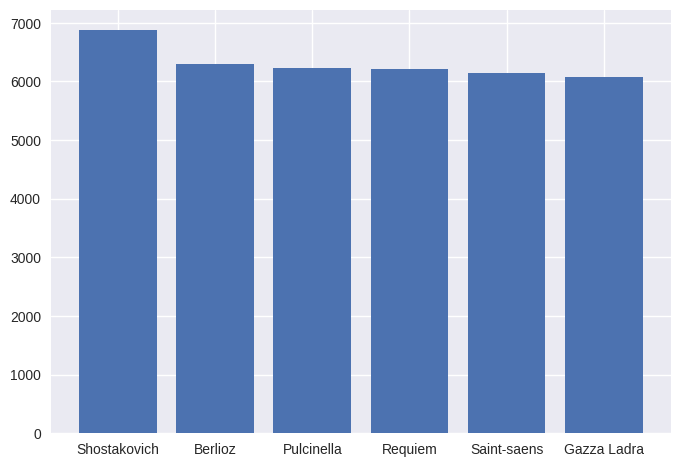

In [14]:
#%% Visualizamos la cantidad de datos que tenemos
# de cada actividad

actividades = df['solo'].value_counts()
plt.bar(range(len(actividades)), actividades.values)
plt.xticks(range(len(actividades)), np.asarray(LABELS)[[actividades.index.astype(int)-1]][0])

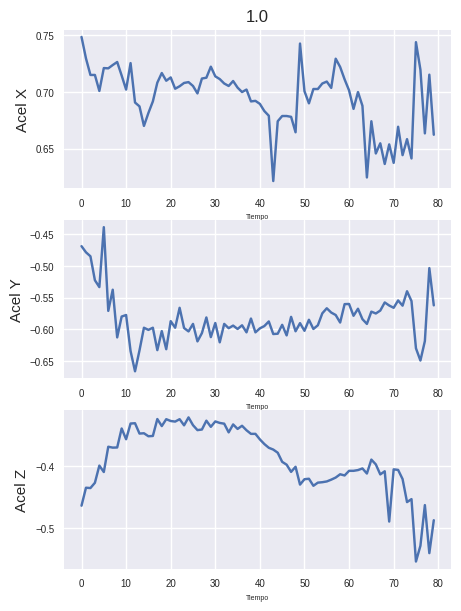

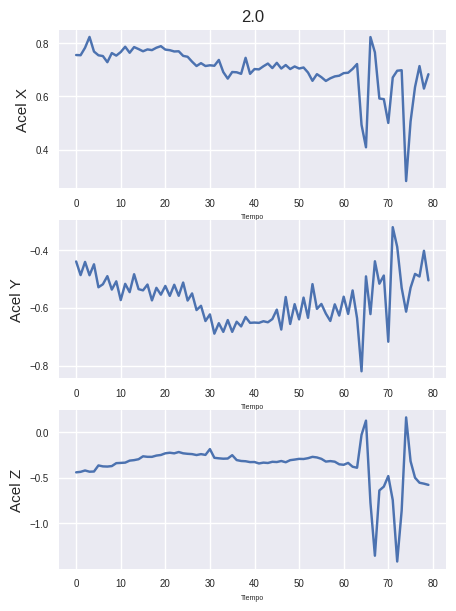

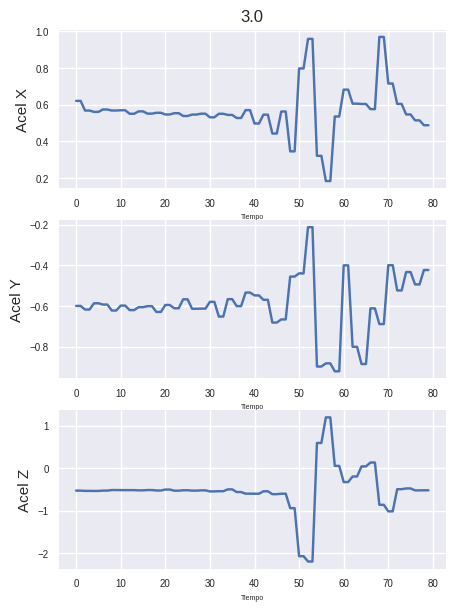

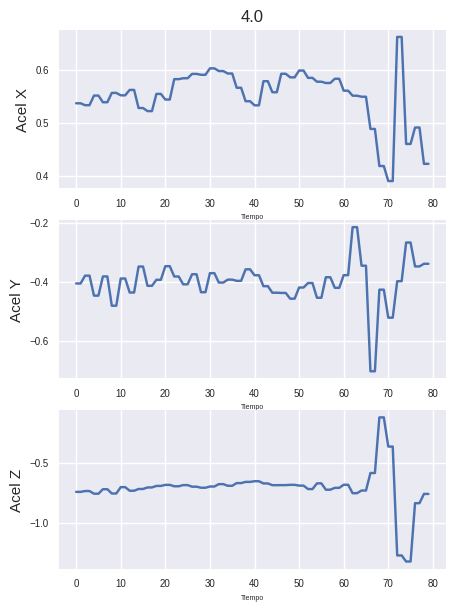

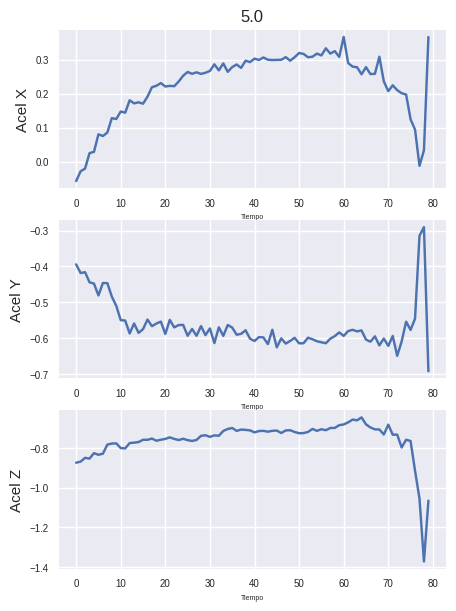

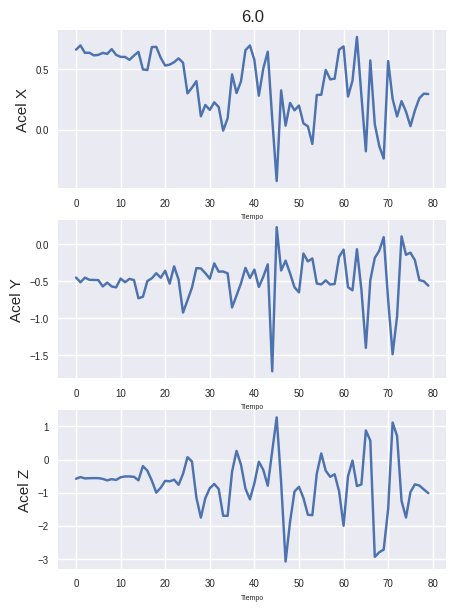

In [15]:
#%% visualizamos

def dibuja_datos_aceleracion(subset, actividad):
    plt.figure(figsize=(5,7))
    plt.subplot(311)
    plt.plot(subset["acel_x"].values)
    plt.xlabel("Tiempo", fontsize=5)
    plt.ylabel("Acel X")
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.title(actividad)
    plt.subplot(312)
    plt.plot(subset["acel_y"].values)
    plt.xlabel("Tiempo", fontsize=5)
    plt.ylabel("Acel Y")
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.subplot(313)
    plt.plot(subset["acel_z"].values)
    plt.xlabel("Tiempo", fontsize=5)
    plt.ylabel("Acel Z")
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

for actividad in np.unique(df['solo']):
    subset = df[df['solo'] == actividad][:80]
    dibuja_datos_aceleracion(subset, actividad)

In [16]:
#%% Codificamos la actividad de manera numérica

from sklearn import preprocessing

LABEL = 'SoloEncoded'
# Transformar las etiquetas de String a Integer mediante LabelEncoder
le = preprocessing.LabelEncoder()

# Añadir una nueva columna al DataFrame existente con los valores codificados
df[LABEL] = le.fit_transform(df['solo'].values.ravel())

print(df.head())

     acel_x    acel_y    acel_z    gyro_x    gyro_y    gyro_z  solo  nivel  \
0  0.748431 -0.468943 -0.463739 -0.444962  0.035246 -0.066947   1.0    5.0   
1  0.729520 -0.478592 -0.434816 -0.347529  0.019669 -0.007388   1.0    5.0   
2  0.714973 -0.484864 -0.435298 -0.378072  0.027305  0.019795   1.0    5.0   
3  0.714973 -0.522495 -0.426862 -0.241544  0.048380  0.024377   1.0    5.0   
4  0.700911 -0.533350 -0.399143 -0.416557  0.030665 -0.000058   1.0    5.0   

   user_id  SoloEncoded  
0      1.0            0  
1      1.0            0  
2      1.0            0  
3      1.0            0  
4      1.0            0  


In [17]:
#%% Normalizamos los datos

df["acel_x"] = (df["acel_x"] - min(df["acel_x"].values)) / (max(df["acel_x"].values) - min(df["acel_x"].values))
df["acel_y"] = (df["acel_y"] - min(df["acel_y"].values)) / (max(df["acel_y"].values) - min(df["acel_y"].values))
df["acel_z"] = (df["acel_z"] - min(df["acel_z"].values)) / (max(df["acel_z"].values) - min(df["acel_z"].values))
df["gyro_x"] = (df["gyro_x"] - min(df["gyro_x"].values)) / (max(df["gyro_x"].values) - min(df["gyro_x"].values))
df["gyro_y"] = (df["gyro_y"] - min(df["gyro_y"].values)) / (max(df["gyro_y"].values) - min(df["gyro_y"].values))
df["gyro_z"] = (df["gyro_z"] - min(df["gyro_z"].values)) / (max(df["gyro_z"].values) - min(df["gyro_z"].values))
df["nivel"] = df["nivel"] / 5

Text(0, 0.5, 'Acel X')

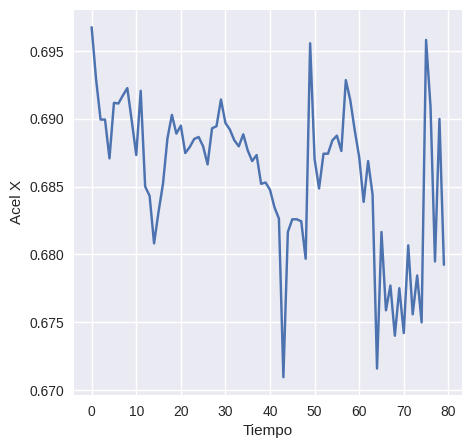

In [18]:
#%% Representamos para ver que se ha hecho bien

plt.figure(figsize=(5,5))
plt.plot(df["acel_x"].values[:80])
plt.xlabel("Tiempo")
plt.ylabel("Acel X")

In [36]:
#%% Divión datos den entrenamiento y test

user_test = np.random.randint(1, 8)
df_test = df[df['user_id'] == user_test]
df_train = df[df['user_id'] != user_test]

print("Entrenamiento", df_train.shape)
print("Test", df_test.shape)

Entrenamiento (32512, 10)
Test (5331, 10)


In [37]:
#%% comprobamos cual ha sido la división

print("Entrenamiento", df_train.shape[0]/df.shape[0])
print("Test", df_test.shape[0]/df.shape[0])

Entrenamiento 0.8591285046111566
Test 0.1408714953888434


In [38]:
SENSOR_MODE = 'giros' # 'both' / 'accel' / 'giros'
print('Using custom sensor input:', SENSOR_MODE)

Using custom sensor input: giros


In [39]:
#%% Creamos las secuencias

from scipy import stats

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html

def create_segments_and_labels(df, time_steps, step, label_name):

    # x, y, z acceleraciones
    N_FEATURES = 6
    if SENSOR_MODE == 'accel' or SENSOR_MODE == 'giros':
      N_FEATURES = 3
    segments = []
    labels = []
    weights = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['acel_x'].values[i: i + time_steps]
        ys = df['acel_y'].values[i: i + time_steps]
        zs = df['acel_z'].values[i: i + time_steps]
        gxs = df['gyro_x'].values[i: i + time_steps]
        gys = df['gyro_y'].values[i: i + time_steps]
        gzs = df['gyro_z'].values[i: i + time_steps]
        nota = df['nivel'].values[i]
        # Lo etiquetamos como la actividad más frecuente
        label = stats.mode(df[label_name][i: i + time_steps])[0]
        if SENSOR_MODE == 'both':
          segments.append([xs, ys, zs, gxs, gys, gzs])
        elif SENSOR_MODE == 'accel':
          segments.append([xs, ys, zs])
        elif SENSOR_MODE == 'giros':
          segments.append([gxs, gys, gzs])
        labels.append(label)
        weights.append(nota)

    # Los pasamos a vector
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)
    weights = np.asarray(weights)

    return reshaped_segments, labels, weights

x_train, y_train, nota_train = create_segments_and_labels(df_train,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

x_test, y_test, nota_test = create_segments_and_labels(df_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

In [40]:
print(x_train.shape)
print(y_train.shape)
print(nota_train.shape)
print(np.unique(nota_train)) # notas diferentes

(32412, 100, 3)
(32412,)
(32412,)
[0.2 0.4 0.6 0.8 1. ]


In [41]:
#%% observamos la nueva forma de los datos (80, 3)

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)

#%% datos de entrada de la red neuronal

num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

x_train shape:  (32412, 100, 3)
32412 training samples
y_train shape:  (32412,)
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


In [42]:
#%% transformamos los datos a flotantes

x_train = x_train.astype('float32')
#y_train = y_train.astype('float32')

x_test = x_test.astype('float32')
#y_test = y_test.astype('float32')

#%% Realizamos el one-hote econding para los datos de salida

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
y_train_hot = cat_encoder.fit_transform(y_train.reshape(len(y_train),1))
y_train = y_train_hot.toarray()

In [48]:
#%% RED NEURONAL

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten, AveragePooling1D
from keras.layers import SimpleRNN

model_m = Sequential()
model_m.add(Conv1D(100, 5, activation='relu', input_shape=(TIME_PERIODS,
                                                            num_sensors)))
model_m.add(Conv1D(100, 5, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(10, 3, activation='relu'))
model_m.add(Conv1D(10, 3, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.2))
model_m.add(Dense(12, activation='relu'))
model_m.add(Dense(num_classes, activation='softmax'))

print(model_m.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 96, 100)           1600      
                                                                 
 conv1d_13 (Conv1D)          (None, 92, 100)           50100     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 30, 100)           0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 28, 10)            3010      
                                                                 
 conv1d_15 (Conv1D)          (None, 26, 10)            310       
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 8, 10)             0         
 g1D)                                                 

In [49]:
!rm -rf results/

In [50]:
# Guardamos el mejor modelo y utilizamos early stopping
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='results/best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
]

#determinamos la función de pérdida, optimizador y métrica de funcionamiento

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'], weighted_metrics=[keras.metrics.RootMeanSquaredError()])

In [ ]:
#%% Entrenamiento

BATCH_SIZE = 400
EPOCHS = 200

history = model_m.fit(x_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      sample_weight=nota_train,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/200
65/65 [==============================] - 4s 24ms/step - loss: 1.4963 - accuracy: 0.1922 - root_mean_squared_error: 0.3721 - val_loss: 1.4741 - val_accuracy: 0.1390 - val_root_mean_squared_error: 0.3744
Epoch 2/200
65/65 [==============================] - 1s 15ms/step - loss: 1.4556 - accuracy: 0.2326 - root_mean_squared_error: 0.3688 - val_loss: 1.3906 - val_accuracy: 0.2206 - val_root_mean_squared_error: 0.3669
Epoch 3/200
65/65 [==============================] - 1s 13ms/step - loss: 1.3671 - accuracy: 0.2612 - root_mean_squared_error: 0.3617 - val_loss: 1.3688 - val_accuracy: 0.2082 - val_root_mean_squared_error: 0.3645
Epoch 4/200
65/65 [==============================] - 1s 13ms/step - loss: 1.3400 - accuracy: 0.2806 - root_mean_squared_error: 0.3592 - val_loss: 1.3138 - val_accuracy: 0.2934 - val_root_mean_squared_error: 0.3602
Epoch 5/200
65/65 [==============================] - 1s 14ms/step - loss: 1.3115 - accuracy: 0.3063 - root_mean_squared_error: 0.3564 - val_loss

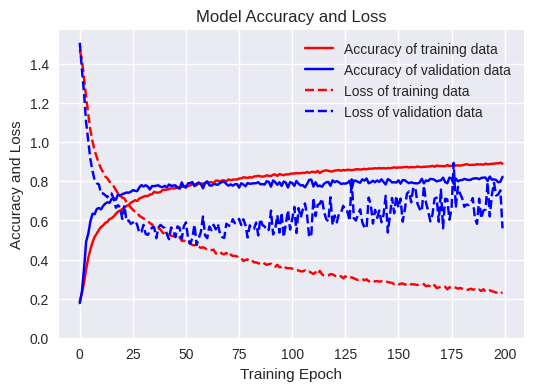

In [30]:
#%% Visualización entrenamiento

from sklearn.metrics import classification_report

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [31]:
#%% Evaluamos el modelo en los datos de test

y_test_hot = cat_encoder.fit_transform(y_test.reshape(len(y_test),1))

In [33]:
# actualizar dependiendo del nombre del modelo guardado
model_m = keras.models.load_model("results/best_model.56-0.47.h5")

y_test = y_test_hot.toarray()
test_loss, test_acc, test_rme = model_m.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

166/166 [==============================] - 2s 6ms/step - loss: 1.0300 - accuracy: 0.6764 - root_mean_squared_error: 0.2827
Test accuracy 0.6764150857925415
Test loss 1.0300493240356445


In [34]:
#%%
# Print confusion matrix for training data
y_pred_train = model_m.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
max_y_train = np.argmax(y_train, axis=1)
print(classification_report(max_y_train, max_y_pred_train))

1011/1011 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      5934
           1       0.83      0.80      0.81      5319
           2       0.94      0.73      0.82      5168
           3       0.91      0.74      0.82      5400
           4       0.69      0.95      0.80      5250
           5       0.97      0.87      0.92      5272

    accuracy                           0.81     32343
   macro avg       0.84      0.82      0.82     32343
weighted avg       0.84      0.81      0.82     32343



166/166 [==============================] - 0s 2ms/step


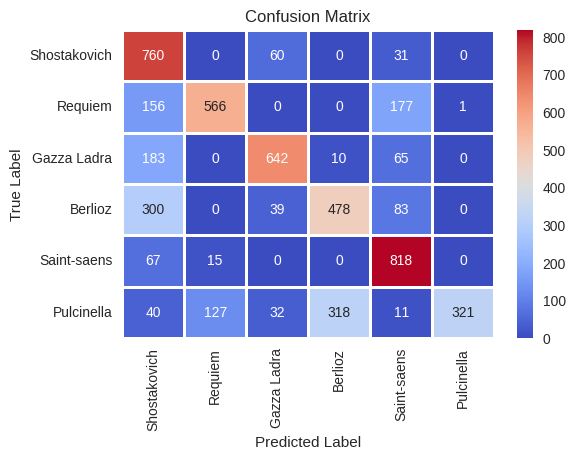

              precision    recall  f1-score   support

           0       0.50      0.89      0.64       851
           1       0.80      0.63      0.70       900
           2       0.83      0.71      0.77       900
           3       0.59      0.53      0.56       900
           4       0.69      0.91      0.78       900
           5       1.00      0.38      0.55       849

    accuracy                           0.68      5300
   macro avg       0.74      0.68      0.67      5300
weighted avg       0.74      0.68      0.67      5300



In [35]:
#%%
import seaborn as sns
from sklearn import metrics

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model_m.predict(x_test)

#%% Toma la clase con la mayor probabilidad a partir de las predicciones de la prueba
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

#%%
show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

In [101]:
!cp -r "results/best_model.62-0.11.h5" "bm_6124_1536.h5"